In [255]:
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
file_name = r'C:\Program Files\MATLAB\R2016b\toolbox\stats\statsdemos\carbig.mat'
X = sio.loadmat(file_name)

In [22]:
X.keys()
# X['key'] is a 2D array of shape NX1 where N being the number of observations, X[key][:,0] helps turns this into a 1d array of shape (N,)
data = pd.DataFrame({"Weight": X['Weight'][:,0],"Horsepower":X['Horsepower'][:,0]})
# Data = pd.DataFrame(X[])

In [24]:
X['Weight'][:,0].shape

(406,)

In [27]:
data.head()
N = data.shape[0]
N

406

In [28]:
feature = np.reshape(X['Weight'],(N,-1))
feature.shape

(406, 1)

In [32]:
design = np.hstack((feature,np.ones((N,1)))) # design is a 406,2 np array

In [40]:
d = pd.DataFrame(design,columns=['Weight','Dummy'])

In [41]:
d.head()

,Weight,Dummy
0,3504.0,1.0
1,3693.0,1.0
2,3436.0,1.0
3,3433.0,1.0
4,3449.0,1.0


In [450]:
t = X['Horsepower'][:,0]
t = pd.DataFrame(t,columns=['Horsepower'])
t.head()
# t = np.reshape(t,(N,1))

,Horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0


In [451]:

t = t.fillna(0)
t[t.Horsepower.isnull()]

,Horsepower


In [452]:
t.shape

(406, 1)

In [465]:
t=t.astype(int)
W1 = np.matmul(np.linalg.pinv(d),t)
W2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(d.transpose(),design)),d.transpose()),t)
W3 = np.linalg.inv(d.T.dot(design)).dot(d.T).dot(t) #weight vector
print(W1)
print(W2)
print(W3)

[[  0.04022435]
 [-16.31543427]]
[[  0.04022435]
 [-16.31543427]]
[[  0.04022435]
 [-16.31543427]]


# As of mid 2016 (numpy 1.10.1), you can try the experimental numpy.matmul, which works like numpy.dot with two major exceptions: no scalar multiplication but it works with stacks of matrices.

In [454]:
def J(W): #My initial
    return np.subtract(np.matmul(W.transpose(),np.matmul(design.transpose(),design)), np.matmul(t.transpose(),design))
    #This is same as W.T.dot(design.T.dot(design)) - t.T.dot(design) and gives same output
def J2(W): # Got from web
    return d.values.T.dot(np.dot(d,W) - t.values)
def J3(W): #My modified
    return W.T.dot(design.T).dot(design) - t.values.T.dot(design)

In [496]:
np.random.seed(42)
W4 = np.random.randn(2,1)

In [497]:
print(J2(W4))
print(J(W4))
print(J3(W4).T)

[[1.79740357e+09]
 [5.58757166e+05]]
[[1.79740357e+09 5.58757166e+05]]
[[1.79740357e+09]
 [5.58757166e+05]]


In [498]:
learning_rate = 0.000000000001
print(W4)
N

[[ 0.49671415]
 [-0.1382643 ]]


406

In [523]:
W_final = W4
for i in range(900): 
    W_temp = W_final - learning_rate*J2(W_final)
    W_final = W_temp
    

In [524]:
W_final

array([[ 0.04897061],
       [-0.13840381]])

In [501]:
#X['Horsepower'][:,0]
#d['Weight'][d['Weight'] == np.nan
#t['Horsepower']


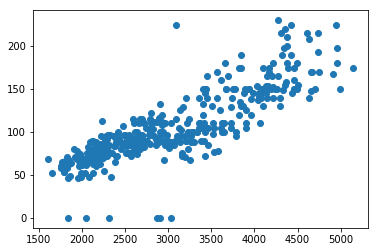

In [502]:
%matplotlib inline
plt.scatter(d['Weight'],t['Horsepower'])
plt.show()

In [503]:
Y = np.dot(d,W_final)
Y2 = np.dot(d,W3)
Y.shape #(406,1)
d['Weight'].shape #(406,)

(406,)

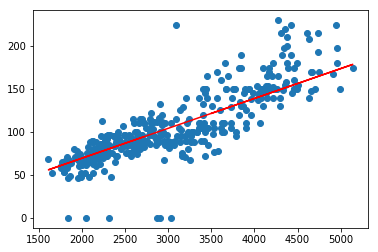

In [504]:
plt.scatter(d['Weight'],t['Horsepower'])
plt.plot(d['Weight'],Y,c='r')

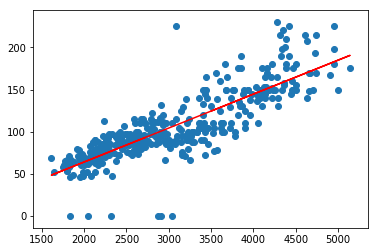

In [464]:
plt.plot(d['Weight'],Y2,c='r')
plt.scatter(d['Weight'],t['Horsepower'])